# Data Pre-Processing

### Import Packages and CSV

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)
#Create Dataframe
df = pd.read_csv(r"IRIS.csv")
#print shape of dataset
print(df.shape)

(150, 5)


## Data Cleaning

### Handling Missing values

* Handling Missing values
* Handling Duplicates
* Check data type
* Understand the dataset

#### Check the Null Values

In [30]:
## these are the features with nan values
features_with_na=[features for features in df.columns if df[features].isnull().sum() >=1]
for feature in features_with_na :
    print(feature,np.round(df[feature].isnull().mean()*100,5),'% missing values')

In [31]:
features_with_na

[]

* There are no null values in the dataset

### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [32]:
duplicate =df[df.duplicated(keep= False)]
print(duplicate)

     sepal_length  sepal_width  petal_length  petal_width         species
9             4.9          3.1           1.5          0.1     Iris-setosa
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
101           5.8          2.7           5.1          1.9  Iris-virginica
142           5.8          2.7           5.1          1.9  Iris-virginica


* **There are three duplicate value**
* **Remove these rows**

In [33]:
bool_series = df.duplicated()
df = df[~bool_series]

In [34]:
df.duplicated().sum()

0

* **All duplicate values are removed**

# Feature Engineering

## Feature Extraction

* **All features are relevant ,so no need to extract any feature**

## Types of Feature

**Numerical Feature**

In [35]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :',len(num_features))

Num of Numerical Features : 4


**Categorical Features**

In [36]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Feature :',len(cat_features))

Num of Categorical Feature : 1


**Discreate features**

In [37]:
threshold_value = 5 #as the total sample are too small (150)
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= threshold_value]
print('Num of Discrete Feature :',len(discrete_features))

Num of Discrete Feature : 0


**Continues Features**

In [38]:
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Feature :',len(continuous_features))

Num of Continuous Feature : 4


### Split X and Y

* Split Dataframe to X and y
* Here we set a variable X i.e. independent columns, and a variable y i.e. dependent columns as the "Species" column. 

In [39]:
X = df.drop('species', axis =1 )
y = df['species']

In [40]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

## Feature Transformation

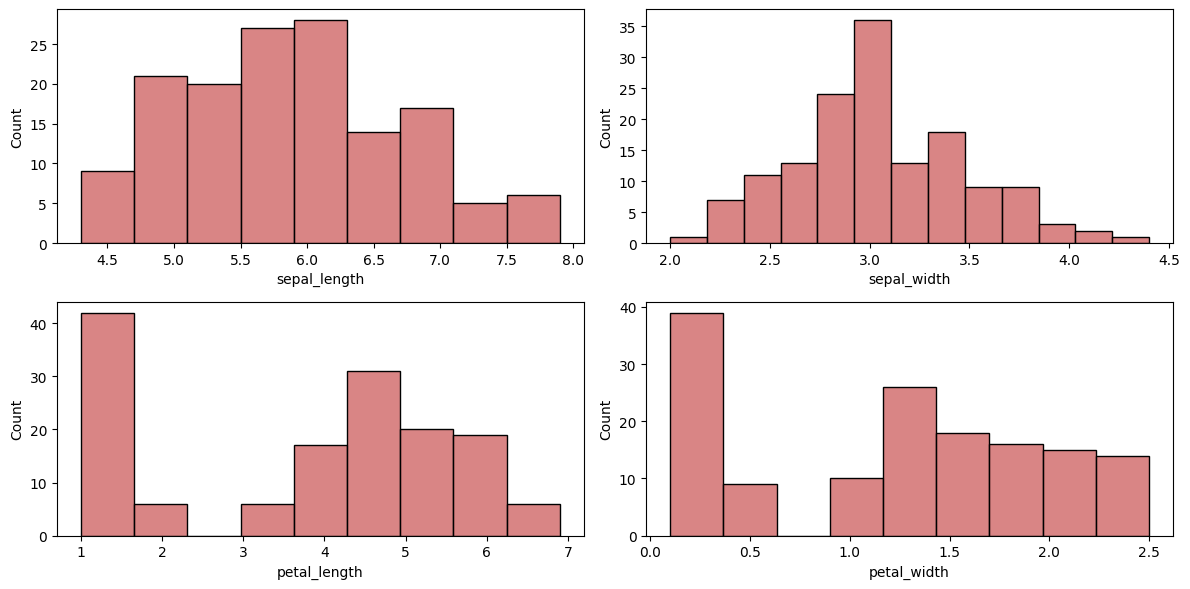

In [41]:
# distribution of data before scaling
plt.figure(figsize=(12,6))
for i,col in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2,2,i+1)
    sns.histplot(X[col],color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

**Data is not skewed so no need to perform any transformation**

In [42]:
#check the skewness
X[continuous_features].skew(axis=0, skipna=True)

sepal_length    0.292560
sepal_width     0.324351
petal_length   -0.293763
petal_width    -0.113479
dtype: float64

## Feature Encoding and Scaling

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories** 
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler** 
* Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

**Selecting number features for preprocessing**

In [43]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [44]:
num_features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

### **Preprocessing using Column Transformer**

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [46]:
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    [
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [47]:
X = preprocessor.fit_transform(X)

## Perform the Ordinal Encoding on output feature (Species)

In [48]:
from sklearn.preprocessing import OrdinalEncoder


In [49]:
y = pd.DataFrame(y) #Change the series to dataframe

In [50]:
ordinal_encoder = OrdinalEncoder()
y = ordinal_encoder.fit_transform(y)

## Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [51]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((117, 4), (30, 4))

In [52]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier

In [53]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted,average=None) # Calculate F1-score
    precision = precision_score(true, predicted,average=None) # Calculate Precision
    recall = recall_score(true, predicted,average=None)  # Calculate Recall
    #roc_auc = roc_auc_score(true, predicted,average=None,multi_class='ovo') #Calculate Roc
    return acc, f1 , precision, recall#, roc_auc

In [54]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    #"XGBClassifier": XGBClassifier(), 
     #"CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [61]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {}".format(model_train_accuracy))
        print('- F1 score: {}'.format(model_train_f1)) 
        print('- Precision: {}'.format(model_train_precision))
        print('- Recall: {}'.format(model_train_recall))
        #print('- Roc Auc Score: {}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {}'.format(model_test_f1))
        print('- Precision: {}'.format(model_test_precision))
        print('- Recall: {}'.format(model_test_recall))
        #print('- Roc Auc Score: {}'.format(model_test_rocauc_score))
        #auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## Model Training 

In [62]:
base_model_report =evaluate_models(X=X, y=y, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0
- F1 score: [1. 1. 1.]
- Precision: [1. 1. 1.]
- Recall: [1. 1. 1.]
----------------------------------
Model performance for Test set
- Accuracy: 0.9333333333333333
- F1 score: [1.         0.9        0.88888889]
- Precision: [1.         0.9        0.88888889]
- Recall: [1.         0.9        0.88888889]


Decision Tree
Model performance for Training set
- Accuracy: 1.0
- F1 score: [1. 1. 1.]
- Precision: [1. 1. 1.]
- Recall: [1. 1. 1.]
----------------------------------
Model performance for Test set
- Accuracy: 0.9333333333333333
- F1 score: [1.         0.9        0.88888889]
- Precision: [1.         0.9        0.88888889]
- Recall: [1.         0.9        0.88888889]


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0
- F1 score: [1. 1. 1.]
- Precision: [1. 1. 1.]
- Recall: [1. 1. 1.]
----------------------------------
Model performance for Test set
- Accuracy: 0.9333333333333333
- F1 score: [1.       

**Results of All Models**

In [63]:
base_model_report

,Model Name,Accuracy
3,Logistic Regression,0.966667
0,Random Forest,0.933333
1,Decision Tree,0.933333
2,Gradient Boosting,0.933333
4,K-Neighbors Classifier,0.933333
5,Support Vector Classifier,0.933333
6,AdaBoost Classifier,0.866667


**Here we can use Random Forest for Hyper Parameter Tuning**

In [66]:
rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}
knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [67]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

**Create a function for model training and report which can be used in hyperparameter tuning loop**

In [69]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X, y)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector 

[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.2s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.4s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.8s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.8s
[CV] END ...max_depth=10, max_features=log2, n_estimators=10; total time=   0.2s[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.9s



/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector 

[CV] END ...max_depth=10, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=10, max_features=log2, n_estimators=10; total time=   0.1s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ...max_depth=10, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END ...max_depth=10, max_features=log2, n_estimators=50; total time=   0.2s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   0.5s
[CV] END ...max_depth=10, max_features=log2, n_estimators=50; total time=   0.5s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   1.9s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   0.5s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   1.9s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   0.9s
[CV] END ...max_depth=10, max_features=None, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=None, n_estimators=10; total time=   0.1s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ...max_depth=10, max_features=None, n_estimators=10; total time=   0.2s
[CV] END ..max_depth=10, max_features=log2, n_estimators=200; total time=   0.9s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=10, max_features=log2, n_estimators=200; total time=   1.0s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ...max_depth=10, max_features=None, n_estimators=50; total time=   0.2s
[CV] END ...max_depth=10, max_features=None, n_estimators=50; total time=   0.5s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ...max_depth=10, max_features=None, n_estimators=50; total time=   0.6s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=10, max_features=None, n_estimators=100; total time=   0.5s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=10, max_features=log2, n_estimators=200; total time=   2.6s
[CV] END ..max_depth=10, max_features=None, n_estimators=100; total time=   1.0s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=10, max_features=None, n_estimators=200; total time=   0.9s
[CV] END ...max_depth=12, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=12, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=12, max_features=sqrt, n_estimators=10; total time=   0.1s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector 

[CV] END ..max_depth=10, max_features=None, n_estimators=100; total time=   1.5s[CV] END ...max_depth=12, max_features=sqrt, n_estimators=50; total time=   0.2s



/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ...max_depth=12, max_features=sqrt, n_estimators=50; total time=   0.2s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=12, max_features=sqrt, n_estimators=100; total time=   0.5s
[CV] END ...max_depth=12, max_features=sqrt, n_estimators=50; total time=   0.8s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=12, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=10, max_features=None, n_estimators=200; total time=   2.0s
[CV] END ..max_depth=10, max_features=None, n_estimators=200; total time=   2.1s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=12, max_features=sqrt, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=12, max_features=log2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=12, max_features=log2, n_estimators=10; total time=   0.1s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ...max_depth=12, max_features=log2, n_estimators=10; total time=   0.1s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=12, max_features=sqrt, n_estimators=200; total time=   0.9s
[CV] END ...max_depth=12, max_features=log2, n_estimators=50; total time=   0.4s
[CV] END ...max_depth=12, max_features=log2, n_estimators=50; total time=   0.2s

/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



[CV] END ...max_depth=12, max_features=log2, n_estimators=50; total time=   0.3s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=12, max_features=log2, n_estimators=100; total time=   0.5s
[CV] END ..max_depth=12, max_features=sqrt, n_estimators=200; total time=   1.7s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=12, max_features=sqrt, n_estimators=200; total time=   1.9s
[CV] END ..max_depth=12, max_features=log2, n_estimators=100; total time=   0.5s
[CV] END ..max_depth=12, max_features=log2, n_estimators=100; total time=   0.9s
[CV] END ...max_depth=12, max_features=None, n_estimators=10; total time=   0.1s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector 

[CV] END ...max_depth=12, max_features=None, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=12, max_features=None, n_estimators=10; total time=   0.1s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=12, max_features=log2, n_estimators=200; total time=   0.9s
[CV] END ...max_depth=12, max_features=None, n_estimators=50; total time=   0.6s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ...max_depth=12, max_features=None, n_estimators=50; total time=   0.2s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ...max_depth=12, max_features=None, n_estimators=50; total time=   0.4s
[CV] END ..max_depth=12, max_features=log2, n_estimators=200; total time=   1.9s
[CV] END ..max_depth=12, max_features=None, n_estimators=100; total time=   0.5s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=12, max_features=log2, n_estimators=200; total time=   1.8s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=12, max_features=None, n_estimators=100; total time=   0.8s
[CV] END ..max_depth=12, max_features=None, n_estimators=100; total time=   0.7s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.1s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.1s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=12, max_features=None, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=12, max_features=None, n_estimators=200; total time=   1.2s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.3s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.6s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.5s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=12, max_features=None, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.6s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.9s
[CV] END .max_depth=None, max_features=log2, n_estimators=10; total time=   0.1s
[CV] END .max_depth=None, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END .max_depth=None, max_features=log2, n_estimators=10; total time=   0.1s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector 

[CV] END .max_depth=None, max_features=log2, n_estimators=50; total time=   0.4s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .max_depth=None, max_features=log2, n_estimators=50; total time=   0.3s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=   1.3s
[CV] END .max_depth=None, max_features=log2, n_estimators=50; total time=   0.3s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=   1.7s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, max_features=log2, n_estimators=100; total time=   0.6s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, max_features=log2, n_estimators=100; total time=   0.9s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, max_features=log2, n_estimators=100; total time=   1.3s
[CV] END .max_depth=None, max_features=None, n_estimators=10; total time=   0.1s
[CV] END .max_depth=None, max_features=None, n_estimators=10; total time=   0.1s
[CV] END .max_depth=None, max_features=None, n_estimators=10; total time=   0.1s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector 

[CV] END max_depth=None, max_features=log2, n_estimators=200; total time=   1.3s
[CV] END .max_depth=None, max_features=None, n_estimators=50; total time=   0.2s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .max_depth=None, max_features=None, n_estimators=50; total time=   0.2s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .max_depth=None, max_features=None, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, max_features=log2, n_estimators=200; total time=   1.7s
[CV] END max_depth=None, max_features=None, n_estimators=100; total time=   0.5s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, max_features=log2, n_estimators=200; total time=   1.9s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, max_features=None, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=None, n_estimators=100; total time=   1.0s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector 

[CV] END max_depth=None, max_features=None, n_estimators=200; total time=   0.9s
[CV] END ...max_depth=15, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=15, max_features=sqrt, n_estimators=10; total time=   0.2s
[CV] END ...max_depth=15, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=15, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END ...max_depth=15, max_features=sqrt, n_estimators=50; total time=   0.5s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ...max_depth=15, max_features=sqrt, n_estimators=50; total time=   0.3s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=None, max_features=None, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, max_features=None, n_estimators=200; total time=   1.8s
[CV] END ..max_depth=15, max_features=sqrt, n_estimators=100; total time=   0.5s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=15, max_features=sqrt, n_estimators=100; total time=   0.4s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=15, max_features=sqrt, n_estimators=100; total time=   1.2s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ...max_depth=15, max_features=log2, n_estimators=10; total time=   0.3s
[CV] END ...max_depth=15, max_features=log2, n_estimators=10; total time=   0.2s
[CV] END ...max_depth=15, max_features=log2, n_estimators=10; total time=   0.0s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector 

[CV] END ...max_depth=15, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END ..max_depth=15, max_features=sqrt, n_estimators=200; total time=   1.0s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ...max_depth=15, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END ...max_depth=15, max_features=log2, n_estimators=50; total time=   0.3s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=15, max_features=log2, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=15, max_features=sqrt, n_estimators=200; total time=   1.9s
[CV] END ..max_depth=15, max_features=sqrt, n_estimators=200; total time=   2.2s
[CV] END ..max_depth=15, max_features=log2, n_estimators=100; total time=   0.5s
[CV] END ..max_depth=15, max_features=log2, n_estimators=100; total time=   0.8s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ...max_depth=15, max_features=None, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=15, max_features=None, n_estimators=10; total time=   0.2s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ...max_depth=15, max_features=None, n_estimators=10; total time=   0.1s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=15, max_features=log2, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=15, max_features=log2, n_estimators=200; total time=   1.1s
[CV] END ...max_depth=15, max_features=None, n_estimators=50; total time=   0.2s
[CV] END ...max_depth=15, max_features=None, n_estimators=50; total time=   0.7s
[CV] END ..max_depth=15, max_features=log2, n_estimators=200; total time=   1.6s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector 

[CV] END ...max_depth=15, max_features=None, n_estimators=50; total time=   0.2s
[CV] END ..max_depth=15, max_features=None, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=15, max_features=None, n_estimators=100; total time=   0.4s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=15, max_features=None, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=20, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=20, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=20, max_features=sqrt, n_estimators=10; total time=   0.0s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector 

[CV] END ...max_depth=20, max_features=sqrt, n_estimators=50; total time=   0.2s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ...max_depth=20, max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END ..max_depth=15, max_features=None, n_estimators=200; total time=   0.8s
[CV] END ..max_depth=15, max_features=None, n_estimators=200; total time=   0.7s
[CV] END ...max_depth=20, max_features=sqrt, n_estimators=50; total time=   0.2s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector 

[CV] END ..max_depth=15, max_features=None, n_estimators=200; total time=   0.8s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END ...max_depth=20, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=20, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=20, max_features=log2, n_estimators=10; total time=   0.0s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector 

[CV] END ...max_depth=20, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END ...max_depth=20, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.7s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ...max_depth=20, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.8s
[CV] END ..max_depth=20, max_features=log2, n_estimators=100; total time=   0.3s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector 

[CV] END ..max_depth=20, max_features=log2, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=20, max_features=log2, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=20, max_features=None, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=20, max_features=None, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=20, max_features=None, n_estimators=10; total time=   0.0s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector 

[CV] END ...max_depth=20, max_features=None, n_estimators=50; total time=   0.2s
[CV] END ...max_depth=20, max_features=None, n_estimators=50; total time=   0.2s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time=   0.6s
[CV] END ...max_depth=20, max_features=None, n_estimators=50; total time=   0.2s
[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time=   0.9s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time=   1.0s
[CV] END ..max_depth=20, max_features=None, n_estimators=100; total time=   0.4s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=20, max_features=None, n_estimators=100; total time=   0.5s
[CV] END ..max_depth=20, max_features=None, n_estimators=100; total time=   0.5s


/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ..max_depth=20, max_features=None, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=20, max_features=None, n_estimators=200; total time=   1.0s
[CV] END ..max_depth=20, max_features=None, n_estimators=200; total time=   1.0s
Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=4, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=4, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=4, we

/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A col

[CV] END ....algorithm=auto, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=4, weights=uniform; total time=   0.0s[CV] END algorithm=ball_tree, n_neighbors=3, weights=distance; total time=   0.0s

[CV] END algorithm=ball_t

/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A col

[CV] END .algorithm=kd_tree, n_neighbors=7, weights=distance; total time=   0.0s[CV] END .algorithm=kd_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..algorithm=kd_tree, n_neighbors=3, weights=uniform; total time=   0.0s

[CV] END .algorithm=kd_tree, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END .algorithm=kd_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END .algorithm=kd_tree, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..algorithm=kd_tree, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END .algorithm=kd_tree, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..algorithm=kd_tree, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..algorithm=kd_tree, n_neighbors=7, weights=uniform; total time=   0.0s[CV] END ..algorithm=kd_tree, n_neighbors=3, weights=uniform; total time=   0.0s

[CV] END .algorithm=kd_tree, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..algorithm=kd_tree

/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A col

[CV] END ...algorithm=brute, n_neighbors=7, weights=distance; total time=   0.1s
[CV] END ...algorithm=brute, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ....algorithm=brute, n_neighbors=4, weights=uniform; total time=   0.2s
[CV] END ....algorithm=brute, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ....algorithm=brute, n_neighbors=4, weights=uniform; total time=   0.0s
[CV] END ....algorithm=brute, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ....algorithm=brute, n_neighbors=4, weights=uniform; total time=   0.0s
[CV] END ....algorithm=brute, n_neighbors=9, weights=uniform; total time=   0.0s
[CV] END ...algorithm=brute, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ...algorithm=brute, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ....algorithm=brute, n_neighbors=3, weights=uniform; total time=   0.3s
[CV] END ...algorithm=brute, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ...algorithm=brute,

/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/coder/.miniconda3/envs/ml_basic/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A col

In [70]:
model_param

{'RF': {'n_estimators': 10, 'max_features': 'log2', 'max_depth': 10},
 'KNN': {'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'auto'}}

## Retraining  model with the best parameter

In [72]:
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    }
tuned_report =evaluate_models(X=X, y=y, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0
- F1 score: [1. 1. 1.]
- Precision: [1. 1. 1.]
- Recall: [1. 1. 1.]
----------------------------------
Model performance for Test set
- Accuracy: 0.9333333333333333
- F1 score: [1.         0.9        0.88888889]
- Precision: [1.         0.9        0.88888889]
- Recall: [1.         0.9        0.88888889]


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0
- F1 score: [1. 1. 1.]
- Precision: [1. 1. 1.]
- Recall: [1. 1. 1.]
----------------------------------
Model performance for Test set
- Accuracy: 0.9333333333333333
- F1 score: [1.         0.9        0.88888889]
- Precision: [1.         0.9        0.88888889]
- Recall: [1.         0.9        0.88888889]




In [73]:
tuned_report

,Model Name,Accuracy
0,Random Forest Classifier,0.933333
1,KNeighborsClassifier,0.933333


In [75]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9333
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.90      0.90      0.90        10
         2.0       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



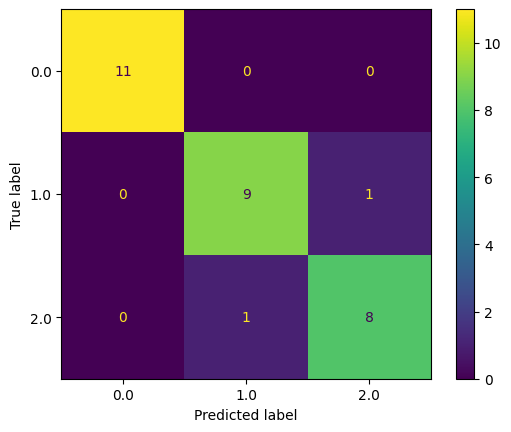

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best Model is K-Nearest Neighbor(KNN) with Accuracy 93.33%

## ALL THE BEST